# Statistics Mini Project


# Unlocking Customer Insights: A Statistical Investigation

### Step 1: Understand Your Data
Business Purpose: Familiarize yourself with who your customers are and what attributes are available to you.

●	Load and preview the dataset.

●	Check data types, unique values, and presence of nulls.

●	Understand which variables are categorical and which are numerical.


#### Firstly to do a Statistical Investigation we have to import important libraries to get the desired results.

In [4]:
!pip install scipy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
# Load and preview the data
data = pd.read_csv('/content/US_Customer_Insights_Dataset.csv')
data.head()

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103


In [7]:
data.shape

(10675, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


#### Here we can see only 3 to 4 columns are numerical columns and all the rest one are categorical columns

In [9]:
data.describe(include='all')

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
count,10675,10675,10675,10675,10675,10675.000000,10675,10675.000000,10675,10675,10675.000000,10675.000000
unique,1000,990,10,5,3,NaN,2,NaN,731,1605,NaN,NaN
top,CUST10798,Joseph Mcbride,California,Master,Male,NaN,No,NaN,12/6/21,7/24/25,NaN,NaN
freq,24,29,1180,2269,3791,NaN,5583,NaN,46,24,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.474567,NaN,1.340515,NaN,NaN,331.610315,538.469883
std,NaN,NaN,NaN,NaN,NaN,18.221365,NaN,1.150849,NaN,NaN,225.799253,398.766747
min,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,0.000000,NaN,NaN,3.890000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,0.000000,NaN,NaN,165.495000,218.000000
50%,NaN,NaN,NaN,NaN,NaN,49.000000,NaN,1.000000,NaN,NaN,282.110000,445.000000
75%,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,2.000000,NaN,NaN,443.255000,788.500000


In [10]:
data.nunique()

,0
CustomerID,1000
Name,990
State,10
Education,5
Gender,3
Age,63
Married,2
NumPets,5
JoinDate,731
TransactionDate,1605


In [11]:
data.isna().sum()

,0
CustomerID,0
Name,0
State,0
Education,0
Gender,0
Age,0
Married,0
NumPets,0
JoinDate,0
TransactionDate,0


#### As there are no null values it makes our data more compatible and easy to compute

### Step 2: Descriptive Statistics
Business Purpose: Describe your customer base — how old are they, how much do they spend, are they active?

●	Compute:

o	Mean, median, std dev for Age, MonthlySpend, DaysSinceLastInteraction

o	Mode for categorical variables: Gender, Education, Married


In [12]:
# mean

print("Mean of Age:- ",np.mean(data['Age']))
print("Mean of MonthlySpend:- ",np.mean(data['MonthlySpend']))
print("Mean of DaysSinceLastInteraction:- ",np.mean(data['DaysSinceLastInteraction']))

Mean of Age:-  49.47456674473068
Mean of MonthlySpend:-  331.61031475409834
Mean of DaysSinceLastInteraction:-  538.4698829039812


In [13]:
# median

print("Median of Age:- ",np.median(data['Age']))
print("Median of MonthlySpend:- ",np.median(data['MonthlySpend']))
print("Median of DaysSinceLastInteraction:- ",np.median(data['DaysSinceLastInteraction']))

Median of Age:-  49.0
Median of MonthlySpend:-  282.11
Median of DaysSinceLastInteraction:-  445.0


In [14]:
# std dev

print("Std Dev of Age:- ",np.std(data['Age']))
print("Std Dev of MonthlySpend:- ",np.std(data['MonthlySpend']))
print("Std Dev of DaysSinceLastInteraction:- ",np.std(data['DaysSinceLastInteraction']))

Std Dev of Age:-  18.22051201441823
Std Dev of MonthlySpend:-  225.78867643313745
Std Dev of DaysSinceLastInteraction:-  398.7480685943375


In [15]:
# Mode for categorical variables: Gender, Education, Married

modes = {
    'Gender': data['Gender'].mode()[0],
    'Education': data['Education'].mode()[0],
    'Married': data['Married'].mode()[0]
}
print(modes)

{'Gender': 'Male', 'Education': 'Master', 'Married': 'No'}


### Step 3: Data Visualization
Business Purpose: Reveal patterns that numbers alone can’t show.

●	Plot histograms and boxplots for Age, MonthlySpend

●	Create a bar chart for Gender, Education, State

●	Scatterplot: Age vs MonthlySpend

●	KDE: Spending behavior by education level or marital status


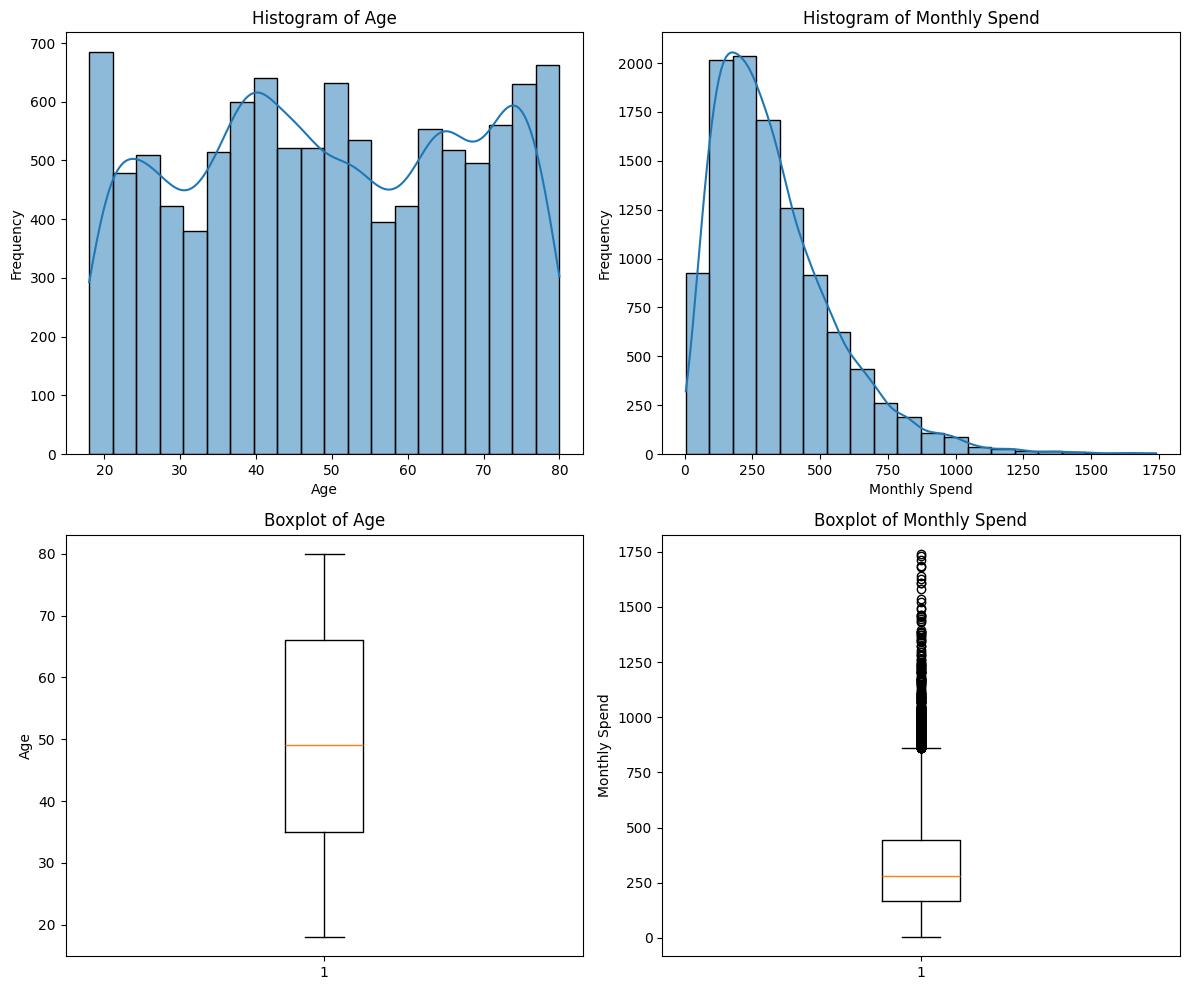

In [16]:
# histograms and boxplots for Age, MonthlySpend
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.histplot(data['Age'], kde=True, bins= 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.subplot(2,2,2)
sns.histplot(data['MonthlySpend'], kde=True, bins= 20)
plt.xlabel('Monthly Spend')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Spend')

plt.subplot(2,2,3)
plt.boxplot(data['Age'])
plt.ylabel('Age')
plt.title('Boxplot of Age')

plt.subplot(2,2,4)
plt.boxplot(data['MonthlySpend'])
plt.ylabel('Monthly Spend')
plt.title('Boxplot of Monthly Spend')

plt.tight_layout()
plt.show()

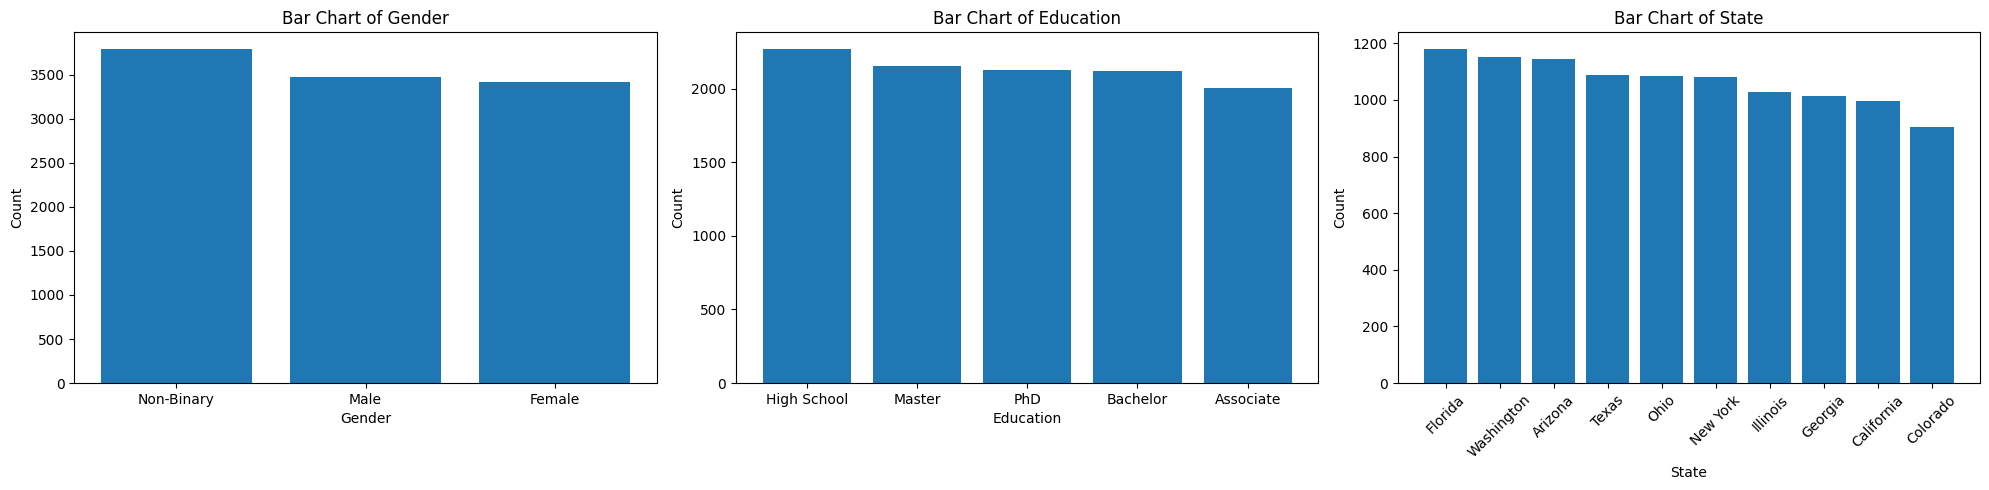

In [17]:
# Create a bar chart for Gender, Education, State

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.bar(data['Gender'].unique(), data['Gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart of Gender')

plt.subplot(1, 3, 2)
plt.bar(data['Education'].unique(), data['Education'].value_counts())
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Chart of Education')

plt.subplot(1, 3, 3)
plt.bar(data['State'].unique(), data['State'].value_counts())
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Bar Chart of State')

plt.tight_layout()
plt.show()

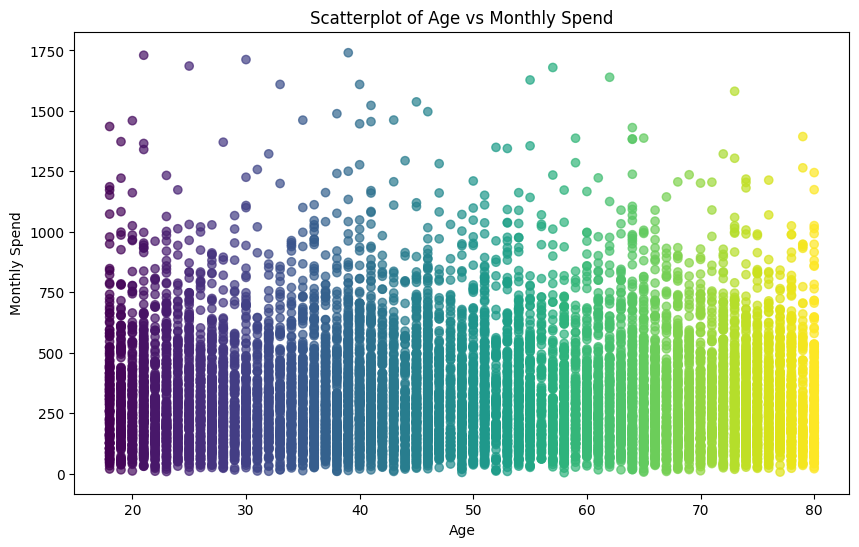

In [18]:
# Scatterplot: Age vs MonthlySpend

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['MonthlySpend'], c=data["Age"], cmap="viridis", alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.title('Scatterplot of Age vs Monthly Spend')
plt.show()

/tmp/ipython-input-3377458861.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Education'] == 'Master'], x='MonthlySpend', shade=True)
/tmp/ipython-input-3377458861.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Married'] == 'Yes'], x='MonthlySpend', shade=True)


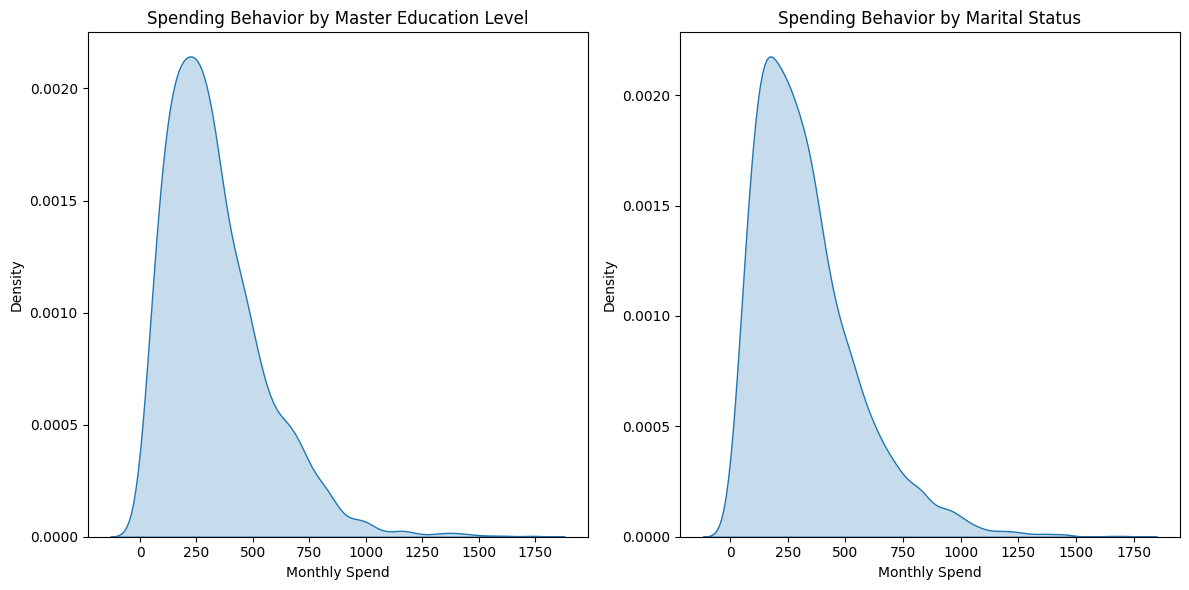

In [19]:
# KDE: Spending behavior by education level or marital status

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data[data['Education'] == 'Master'], x='MonthlySpend', shade=True)
plt.xlabel('Monthly Spend')
plt.ylabel('Density')
plt.title('Spending Behavior by Master Education Level')

plt.subplot(1, 2, 2)
sns.kdeplot(data[data['Married'] == 'Yes'], x='MonthlySpend', shade=True)
plt.xlabel('Monthly Spend')
plt.ylabel('Density')
plt.title('Spending Behavior by Marital Status')

plt.tight_layout()
plt.show()

### Step 4: Bivariate Analysis
Business Purpose: Check how customer attributes relate to one another.

●	Correlation matrix (numeric variables)

●	Crosstab of Gender vs Married

●	Grouped stats: average MonthlySpend by State, Education, Gender


In [20]:
# Correlation matrix (numeric variables)

corr = data.corr(numeric_only=True)
corr

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
Age,1.000000,-0.023035,-0.012323,-0.003970
NumPets,-0.023035,1.000000,0.020647,-0.055227
MonthlySpend,-0.012323,0.020647,1.000000,0.006081
DaysSinceLastInteraction,-0.003970,-0.055227,0.006081,1.000000


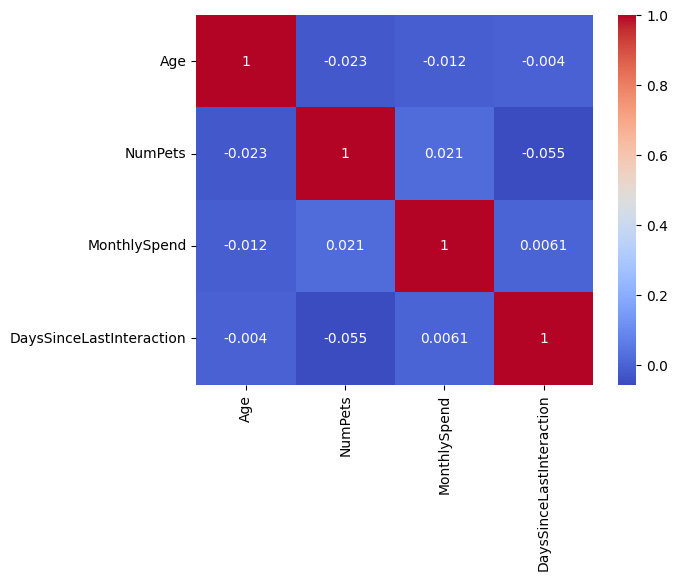

In [21]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Crosstab of Gender vs Married

contigency_table = pd.crosstab(data['Gender'], data['Married'])
contigency_table

Married,No,Yes
Gender,,
Female,1797,1616
Male,1892,1899
Non-Binary,1894,1577


In [23]:
# Grouped stats: average MonthlySpend by State, Education, Gender

avg_spend_state = data.groupby('State')['MonthlySpend'].mean()
print('average MonthlySpend by State:- \n',avg_spend_state)

avg_spend_education = data.groupby('Education')['MonthlySpend'].mean()
print('\naverage MonthlySpend by Education:- \n',avg_spend_education)

avg_spend_gender = data.groupby('Gender')['MonthlySpend'].mean()
print('\naverage MonthlySpend by Gender:- \n',avg_spend_gender)

average MonthlySpend by State:- 
 State
Arizona       341.489135
California    339.183492
Colorado      323.083462
Florida       327.696892
Georgia       328.354648
Illinois      332.589591
New York      332.151244
Ohio          340.187860
Texas         319.506770
Washington    329.444078
Name: MonthlySpend, dtype: float64

average MonthlySpend by Education:- 
 Education
Associate      327.884408
Bachelor       331.884753
High School    332.215712
Master         334.252305
PhD            331.690090
Name: MonthlySpend, dtype: float64

average MonthlySpend by Gender:- 
 Gender
Female        331.361310
Male          333.174068
Non-Binary    330.147240
Name: MonthlySpend, dtype: float64


### Step 5: Formulate Hypotheses
Business Purpose: Turn business questions into statistical tests.


1. Do males and females spend differently?
	Independent t-test

2. Does education level impact average monthly spend?	One-way ANOVA
3. Is marital status related to the number of pets owned? [Only for DS Students]	Chi-square test
4. Are older people less active?	Correlation (Age vs DaysSinceLastInteraction)
5. Does state-wise spend vary significantly?	ANOVA


In [24]:
# Do males and females spend differently?

t_stats, p_value = stats.ttest_ind(data[data['Gender'] == 'Male']['MonthlySpend'], data[data['Gender'] == 'Female']['MonthlySpend'])

print("Independent T-test: Male vs Female Monthly Spend")
print(f"T-statistic: {t_stats:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in monthly spend between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in monthly spend between males and females.")

Independent T-test: Male vs Female Monthly Spend
T-statistic: 0.3392
P-value: 0.7345
Fail to reject the null hypothesis. There is no significant difference in monthly spend between males and females.


In [25]:
# Does education level impact average monthly spend?

education_groups = data.groupby('Education')['MonthlySpend'].mean()
f_statistic, p_value = stats.f_oneway(*[data[data['Education'] == group]['MonthlySpend'] for group in education_groups.index])

print("One-way ANOVA: Monthly Spend by Education Level")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in monthly spend across education levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in monthly spend across education levels.")

One-way ANOVA: Monthly Spend by Education Level
F-statistic: 0.2288
P-value: 0.9224
Fail to reject the null hypothesis. There is no significant difference in monthly spend across education levels.


In [26]:
# Is marital status related to the number of pets owned?

contigency_table = pd.crosstab(data['Married'], data['NumPets'])
contigency_table

NumPets,0,1,2,3,4
Married,,,,,
No,1839,1435,1504,509,296
Yes,1205,1770,1242,598,277


In [27]:
chi2_stats, p_value, dof, expression = stats.chi2_contingency(contigency_table)

print("Chi-square test: Marital Status vs Number of Pets")
print(f"Chi-square statistic: {chi2_stats:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. Marital status and the number of pets owned are not independent.")
else:
    print("Fail to reject the null hypothesis. Marital status and the number of pets owned are independent.")

Chi-square test: Marital Status vs Number of Pets
Chi-square statistic: 177.6395
P-value: 0.0000
Reject the null hypothesis. Marital status and the number of pets owned are not independent.


In [28]:
# Are older people less active?

correlation, p_value = stats.pearsonr(data['Age'], data['DaysSinceLastInteraction'])

print("Correlation: Age vs Days Since Last Interaction")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant correlation between age and days since last interaction.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between age and days since last interaction.")

Correlation: Age vs Days Since Last Interaction
Correlation coefficient: -0.0040
P-value: 0.6817
Fail to reject the null hypothesis. There is no significant correlation between age and days since last interaction.


In [29]:
# Does state-wise spend vary significantly?

state_groups = data.groupby('State')['MonthlySpend'].mean()
f_statistic, p_value = stats.f_oneway(*[data[data['State'] == group]['MonthlySpend'] for group in state_groups.index])

print("ANOVA: Monthly Spend by State")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in monthly spend across states.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in monthly spend across states.")

ANOVA: Monthly Spend by State
F-statistic: 1.1178
P-value: 0.3457
Fail to reject the null hypothesis. There is no significant difference in monthly spend across states.


### Step 6: Run Hypothesis Tests

We tested assumptions about customer spending and behavior using appropriate statistical methods:

1. Gender vs Monthly Spend (t-test)

*   H₀: Males and females spend the same.
*   Result: p = 0.734 (>0.05) → ❌ Fail to reject H₀.
*   Conclusion: No significant difference in spending by gender.


2. Education vs Monthly Spend (ANOVA)

*   H₀: Spending is the same across education levels.

*   Result: p = 0.922 (>0.05) → ❌ Fail to reject H₀.

*   Conclusion: Education does not affect spending.

3. Age vs DaysSinceLastInteraction (Correlation)

*   H₀: No correlation between age and recency.

*   Result: r ≈ -0.004 → negligible.

*   Conclusion: Age does not influence activity/recency.

4. Married vs Pets (Chi-square test)

*   H₀: Marital status and pet ownership are independent.

*   Result: p ≈ 2.4e-37 (<0.05) → ✅ Reject H₀.

*   Conclusion: Strong relationship between marital status and number of pets.

5. State vs Monthly Spend (ANOVA)

*   H₀: Spending is equal across states.

*   Result: p = 0.346 (>0.05) → ❌ Fail to reject H₀.

*   Conclusion: No clear difference across states.

### Step 7: Present Business Insights


## Insights

* Customers are mostly middle-aged (~49 years).

* Average monthly spend is $332, but median is lower ($282) → skewed distribution.

* Customers haven’t interacted recently (median recency ~445 days).

* Gender and education do not drive spending differences.

* Marital status is strongly linked with pet ownership.

* States have similar spending patterns.

## Recommendations

1. Re-engagement campaigns → target inactive customers with personalized offers.

2. Pet & family promotions → design campaigns based on marital status + pets (cross-sell opportunities).

3. Loyalty programs → focus on top-spending segments (e.g., top 20% spenders).

4. Avoid gender/education targeting → not effective since spending is similar across groups.

5. Advanced segmentation → use clustering (RFM/k-means) for precise customer groups.